## Title :
Exercise: Build a Single Neuron by Hand

## Description :
The goal of this exercise is to predict the probability of a person having heart disease given their max heart rate using a **single neuron**.

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions:

- Read the datafile Heart.csv as a pandas dataframe.
- Use the maximum heart rate as your predictor and probability of a person having heart disease as your response variable.
- Plot the data by replacing the column values i.e. 'Yes' and 'No' of the response variables with 1 and 0 respectively. The graph will look like the one given below.
- Construct a perceptron. This will need 3 functions:
    - The first function should return an **affine** transformation of the data for a single neuron.  
    - The second function should return the sigmoid **activation** function. 
    - We'll use the previous two functions to create a **predict** function to output predictions from our perceptron (aka neuron).
- After making predictions using the perceptron we will plot our results.

<img src="../fig/fig2.png" style="width: 500px;">

## Hints: 

- Remember you will need to tune the perceptron's parameters by hand. The following selections from the lecture may be helpful. 

(Note: $\beta_0$  and $\beta_1$ in the slides are referred to as `b` and `w` in the code)

<img src="../fig/fig3.png" style="width: 500px;">

<img src="../fig/fig4.png" style="width: 500px;">


<a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">plt.scatter()</a>
A scatter plot of y vs. x with varying marker size and/or colour.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html" target="_blank">np.exp()</a>
Calculates the exponential of all elements in the input array.

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.xlabel.html" target="_blank">plt.xlabel()</a>
This is used to specify the text to be displayed as the label for the x-axis.

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html" target="_blank">plt.ylabel()</a>
This is used to specify the text to be displayed as the label for the y-axis.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace" target="_blank">pd.replace(from, to)</a>
Replace values given in from with to.


**Note: This exercise is auto-graded and you can try multiple attempts**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read the dataset
heart_data = pd.read_csv('../data/Heart.csv', index_col=0)

# Take a quick look at the dataframe
heart_data.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
# Assign Max Heart Rate as the predictor
x = heart_data.MaxHR.values

# Assign AHD as the response variable
# Replace the string column values to 0 and 1
y = heart_data.AHD.values=="Yes"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


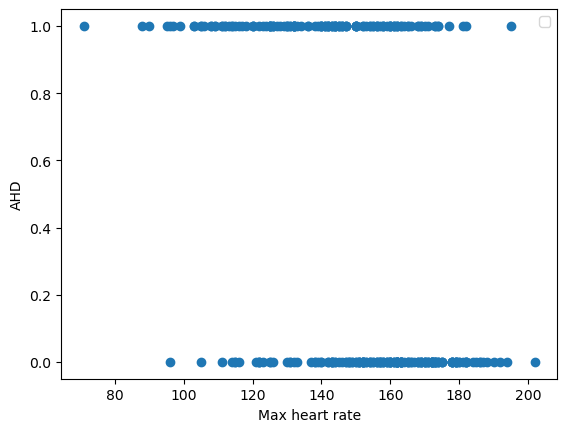

In [9]:
# Plot the predictor and reponse vairables as a scatter plot 
# with appropriate axes label
plt.scatter(x, y)
plt.xlabel("Max heart rate")
plt.ylabel("AHD")
plt.legend(loc='best')


### Construct the components of our percpetron.

In [10]:
### edTest(test_affine) ###

# Function to perform affine transformation
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
    """
    # This works for scalar values only
    # Your code here
    z = x * w + b
    return z


In [11]:
### edTest(test_sigmoid) ###

# Function to apply sigmoid function on the parameter
def sigmoid(z):
    # Hint: numpy has an exponentiation function, np.exp()
    
    # Your code here
    h = 1/(1+np.exp(-z))
    return h


In [12]:
### edTest(test_neuron_predict) ###

# Function to combine the previous operations
def neuron_predict(x, w, b):

    # Call the previous functions
    # Your code here
    h = sigmoid(affine(x, w, b))
    return h
    

### Manually set the weight and bias parameters. 

Recall from lecture that the weight changes the slope of the sigmoid and the bias shifts the function to the left or right.

In [13]:
# Hint: Try values between -1 and 1
w = -1/2

# Hint: Try values between 50 and 100
b = 75


#### Use the perceptron to make predictions and plot our results.

In [14]:
# The forward mode or predict of a single neuron

# Create evenly spaced values of x to predict on
x_linspace = np.linspace(x.min(),x.max(),500) 
h = neuron_predict(x_linspace,w, b)


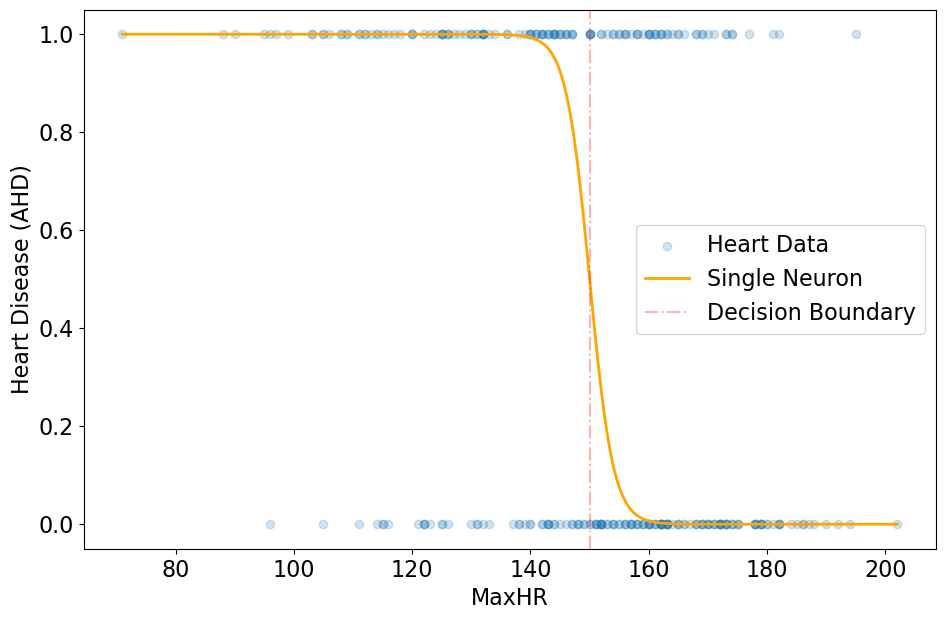

In [15]:
# Plot Predictions
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(x, y, label=r'Heart Data', alpha=0.2)
ax.plot(x_linspace, h, lw=2, c='orange', label=r'Single Neuron')

# First value in x_linspace with a probability < 0.5
db = x_linspace[np.argmax(h<0.5)] 
ax.axvline(x=db, alpha=0.3, linestyle='-.', c='r', label='Decision Boundary')

# Proper plot labels are very important!

# Make the tick labels big enough to read
ax.tick_params(labelsize=16)
plt.xlabel('MaxHR', fontsize=16)
plt.ylabel('Heart Disease (AHD)', fontsize=16)

# Create a legend and make it big enough to read
ax.legend(fontsize=16, loc='best') 
plt.show()


One way to assess our perceptron model's performance is to look at the binary cross entropy loss.

In [16]:
def loss(y_true, y_pred, eps=1e-15):
    assert y_true.shape[0] == y_pred.shape[0]
    
    # Clipping
    y_pred = np.clip(y_pred, eps, 1 - eps)
    # numpy.clip(a, a_min, a_max, out=None, **kwargs)
    # Given an interval, values outside the interval are clipped to the interval edges.
    return -sum(y_true*np.log(y_pred) + (1-y_true)*(np.log(1-y_pred)))

In [17]:
## Print the loss of the single neuron model
h = neuron_predict(x, w, b)
print(loss(y, h))


693.0053846885196


To ensure our perceptron model is not trivial we need to compare its accuracy to a baseline which always predicts the majority class (i.e., no heart disease). Play with your weights above and rerun the notebook until you can outperform the baseline.

In [18]:
def accuracy(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    return sum(y_true == (y_pred >= 0.5).astype(int))/len(y_true)
# !!!!!!
    

In [19]:
### edTest(test_performance) ###

# For the baseline predictions are all ones
baseline_acc = accuracy(y, np.ones(len(y))) 
perceptron_acc = accuracy(y, h)
print(f'Baseline Accuracy: {baseline_acc:.2%}')
print(f'Perceptron Accuracy: {perceptron_acc:.2%}')


Baseline Accuracy: 45.87%
Perceptron Accuracy: 70.30%
